# Análisis de Marketing para Showz
## Optimización de Gastos de Marketing y Comportamiento del Usuario

### Introducción
Este análisis se centra en la optimización de los gastos de marketing de **Showz**, una empresa de venta de entradas para eventos. El objetivo principal es comprender cómo los clientes interactúan con el servicio y determinar qué estrategias de adquisición son más rentables.

### Objetivos del análisis
1. Analizar el comportamiento de los usuarios: Identificar tendencias en visitas, sesiones y compras.
2. Evaluar el rendimiento de las campañas de marketing: Determinar el Costo de Adquisición de Clientes (CAC) y el Retorno sobre la Inversión en Marketing (ROMI).
3. Optimizar el presupuesto de marketing: Identificar qué fuentes de adquisición generan más ingresos en comparación con sus costos.

### Datos utilizados
Se trabajará con tres datasets principales:

1. visits_log_us.csv  - Registros de visitas al sitio web de Showz.
2. orders_log_us.csv  - Datos de pedidos y compras realizadas.
3. costs_us.csv  - Registro de costos de adquisición de clientes.

### Paso 1: Preparación de Datos
El primer paso es cargar los datasets y asegurarnos de que están en el formato correcto. Para ello, realizaremos las siguientes acciones:
- Cargar los datos en variables usando `pandas`.
- Optimizar los tipos de datos para mejorar la eficiencia del análisis.
- Verificar valores nulos o inconsistencias.


# Análisis del dataset de visitas
##  Carga y optimización del archivo `visits_log_us.csv`

### Descripción del dataset
Este archivo contiene registros de visitas al sitio web de Showz. Nos interesa analizar:
- Cantidad de usuarios diarios, semanales y mensuales.
- Duración de las sesiones.
- Frecuencia de visitas.
- Fuentes de adquisición de usuarios.

### Preparación de los datos
En este paso:
- Cargaremos los datos en un DataFrame de pandas.
- Convertiremos las fechas a formato `datetime` para su correcto análisis.
- Verificaremos valores nulos y corregiremos problemas en los tipos de datos.

---

In [12]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
# Definir la ruta del archivo
visits_path = "/datasets/visits_log_us.csv"

# Cargar los datos
visits_df = pd.read_csv(visits_path)

# Mostrar información del dataset
print("Información del dataset de visitas:")
print(visits_df.info(), "\n")

# Convertir columnas de fecha a formato datetime
visits_df["Start Ts"] = pd.to_datetime(visits_df["Start Ts"])
visits_df["End Ts"] = pd.to_datetime(visits_df["End Ts"])

# Verificar valores nulos
print("Valores nulos en visitas:")
print(visits_df.isnull().sum(), "\n")

# Mostrar los primeros registros
print("Primeras filas del dataset de visitas:")
print(visits_df.head())


Información del dataset de visitas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None 

Valores nulos en visitas:
Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64 

Primeras filas del dataset de visitas:
    Device              End Ts  Source Id            Start Ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:

# Análisis del dataset de pedidos
##  Carga y optimización del archivo `orders_log_us.csv`

### Descripción del dataset
Este archivo contiene información sobre los pedidos realizados en Showz. Nos permitirá analizar:
- Cuándo los usuarios comienzan a comprar.
- Frecuencia de compra y monto total gastado.
- Tamaño promedio de los pedidos.
- Valor de por vida del cliente (LTV).

### Preparación de los datos
En este paso:
- Cargaremos los datos en un DataFrame de pandas.
- Convertiremos las fechas de compra a `datetime`.
- Verificaremos valores nulos y tipos de datos.

---


In [2]:
# Definir la ruta del archivo
orders_path = "/datasets/orders_log_us.csv"

# Cargar los datos
orders_df = pd.read_csv(orders_path)

# Mostrar información del dataset
print("Información del dataset de pedidos:")
print(orders_df.info(), "\n")

# Convertir columnas de fecha a formato datetime
orders_df["Buy Ts"] = pd.to_datetime(orders_df["Buy Ts"])

# Verificar valores nulos
print("Valores nulos en pedidos:")
print(orders_df.isnull().sum(), "\n")

# Mostrar los primeros registros
print("Primeras filas del dataset de pedidos:")
print(orders_df.head())


Información del dataset de pedidos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None 

Valores nulos en pedidos:
Buy Ts     0
Revenue    0
Uid        0
dtype: int64 

Primeras filas del dataset de pedidos:
               Buy Ts  Revenue                   Uid
0 2017-06-01 00:10:00    17.00  10329302124590727494
1 2017-06-01 00:25:00     0.55  11627257723692907447
2 2017-06-01 00:27:00     0.37  17903680561304213844
3 2017-06-01 00:29:00     0.55  16109239769442553005
4 2017-06-01 07:58:00     0.37  14200605875248379450


# Análisis del dataset de costos
##  Carga y optimización del archivo `costs_us.csv`

### Descripción del dataset
Este archivo contiene los gastos de marketing de Showz. Nos permitirá calcular:
- Costo total de adquisición de clientes (CAC).
- Retorno sobre inversión en marketing (ROMI).
- Eficiencia de diferentes fuentes de publicidad.

### Preparación de los datos
En este paso:
- Cargaremos los datos en un DataFrame de pandas.
- Convertiremos las fechas a `datetime` para su correcto análisis.
- Verificaremos valores nulos y corregiremos los tipos de datos si es necesario.

---


In [3]:
# Definir la ruta del archivo
costs_path = "/datasets/costs_us.csv"

# Cargar los datos
costs_df = pd.read_csv(costs_path)

# Mostrar información del dataset
print("Información del dataset de costos:")
print(costs_df.info(), "\n")

# Convertir columnas de fecha a formato datetime
costs_df["dt"] = pd.to_datetime(costs_df["dt"])

# Verificar valores nulos
print("Valores nulos en costos:")
print(costs_df.isnull().sum(), "\n")

# Mostrar los primeros registros
print("Primeras filas del dataset de costos:")
print(costs_df.head())


Información del dataset de costos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None 

Valores nulos en costos:
source_id    0
dt           0
costs        0
dtype: int64 

Primeras filas del dataset de costos:
   source_id         dt  costs
0          1 2017-06-01  75.20
1          1 2017-06-02  62.25
2          1 2017-06-03  36.53
3          1 2017-06-04  55.00
4          1 2017-06-05  57.08


## Preparación de Datos

### Resumen de la optimización de datos
Hemos cargado y revisado los tres datasets principales del análisis: visitas, pedidos y costos de marketing. A partir de la exploración inicial, se identificaron los siguientes puntos clave:

### Dataset de Visitas (`visits_log_us.csv`)
- Contiene 359,400 registros de sesiones de usuarios en la plataforma.
- No tiene valores nulos en ninguna columna.
- Las fechas de inicio y fin de sesión (`Start Ts`, `End Ts`) han sido convertidas a formato **datetime**.
- La columna `Source Id` representa la fuente de adquisición de los usuarios.

### Dataset de Pedidos (`orders_log_us.csv`)
- Contiene 50,415 registros de compras realizadas en la plataforma.
- No hay valores nulos en las columnas.
- La fecha de compra (`Buy Ts`) ha sido convertida a datetime.
- La columna `Revenue` representa el ingreso generado por cada compra.
- La columna `Uid` permitirá vincular las compras con los registros de visitas.

### Dataset de Costos (`costs_us.csv`)
- Contiene 2,542 registros de gastos de marketing.
- No tiene valores nulos.
- La columna `dt` ha sido convertida a datetime para facilitar el análisis temporal.
- `source_id` representa la fuente publicitaria y `costs` el gasto correspondiente.


## **Paso 2: Informes y Cálculo de Métricas**


## **Análisis de Visitas**

### **Objetivo**
En esta sección, analizaremos el comportamiento de los usuarios en la plataforma para identificar patrones de uso y tendencias de visitas.

### **Métricas a calcular**
1. Número de usuarios únicos por día, semana y mes.
2. Cantidad de sesiones diarias.
3. Duración promedio de una sesión.
4. Frecuencia de retorno de los usuarios.

El objetivo es comprender cómo los usuarios interactúan con la plataforma y qué tan frecuentemente regresan. Esta información será clave para evaluar el impacto del marketing y la retención de clientes.

---


In [4]:

# Copia del dataset para trabajar
visits_data = visits_df.copy()

# Extraer la fecha de las columnas de timestamp
visits_data["date"] = visits_data["Start Ts"].dt.date

# Calcular número de usuarios únicos por día, semana y mes
users_per_day = visits_data.groupby("date")["Uid"].nunique()
users_per_week = visits_data.groupby(pd.Grouper(key="Start Ts", freq="W"))["Uid"].nunique()
users_per_month = visits_data.groupby(pd.Grouper(key="Start Ts", freq="M"))["Uid"].nunique()

# Calcular el número de sesiones por día
sessions_per_day = visits_data.groupby("date")["Uid"].count()

# Calcular duración de cada sesión
visits_data["session_duration"] = (visits_data["End Ts"] - visits_data["Start Ts"]).dt.total_seconds()
avg_session_duration = visits_data["session_duration"].mean()

# Calcular la frecuencia de retorno de los usuarios
returning_users = visits_data.groupby("Uid")["date"].nunique()
returning_users_distribution = returning_users.value_counts().sort_index()

# Mostrar resultados
print("Número de usuarios únicos por día:")
print(users_per_day.head(), "\n")

print("Número de usuarios únicos por semana:")
print(users_per_week.head(), "\n")

print("Número de usuarios únicos por mes:")
print(users_per_month.head(), "\n")

print("Número de sesiones por día:")
print(sessions_per_day.head(), "\n")

print("Duración promedio de una sesión en segundos:")
print(avg_session_duration, "\n")

print("Distribución de frecuencia de retorno de los usuarios:")
print(returning_users_distribution.head())


Número de usuarios únicos por día:
date
2017-06-01    605
2017-06-02    608
2017-06-03    445
2017-06-04    476
2017-06-05    820
Name: Uid, dtype: int64 

Número de usuarios únicos por semana:
Start Ts
2017-06-04    2021
2017-06-11    4129
2017-06-18    2812
2017-06-25    2878
2017-07-02    3064
Freq: W-SUN, Name: Uid, dtype: int64 

Número de usuarios únicos por mes:
Start Ts
2017-06-30    13259
2017-07-31    14183
2017-08-31    11631
2017-09-30    18975
2017-10-31    29692
Freq: M, Name: Uid, dtype: int64 

Número de sesiones por día:
date
2017-06-01    664
2017-06-02    658
2017-06-03    477
2017-06-04    510
2017-06-05    893
Name: Uid, dtype: int64 

Duración promedio de una sesión en segundos:
643.0256872565387 

Distribución de frecuencia de retorno de los usuarios:
1    183124
2     27591
3      8484
4      3706
5      1821
Name: date, dtype: int64


## Resultados

### Usuarios únicos
- Promedio diario: Alrededor de 600 a 800 usuarios únicos visitan la plataforma cada día.
- Promedio semanal: Varía entre 2,000 y 4,000 usuarios únicos por semana.
- Promedio mensual: En los primeros meses del dataset, la plataforma recibe entre 13,000 y 30,000 usuarios únicos al mes, con una tendencia creciente.

### Sesiones por día
- La cantidad de sesiones por día es ligeramente superior al número de usuarios únicos, lo que indica que algunos usuarios visitan la plataforma más de una vez en el mismo día.
- Ejemplo: El 1 de junio de 2017 hubo 605 usuarios únicos y 664 sesiones, lo que sugiere que algunos usuarios iniciaron más de una sesión.

### Duración promedio de una sesión
- La duración promedio de una sesión es de 643 segundos (aproximadamente 10.7 minutos).
- Esto sugiere que los usuarios pasan un tiempo moderado en la plataforma antes de abandonar la sesión.

### Frecuencia de retorno
- 183,124 usuarios visitaron la plataforma solo una vez.
- 27,591 usuarios regresaron al menos una vez más.
- La cantidad de usuarios disminuye conforme aumenta el número de visitas repetidas, lo que indica que una gran proporción de visitantes son usuarios nuevos o poco recurrentes.

### Conclusiones
1. La plataforma tiene una base de usuarios en crecimiento, con una tendencia positiva en la cantidad de usuarios únicos mensuales.
2. La mayoría de los usuarios no regresan después de su primera visita, lo que sugiere oportunidades de mejora en estrategias de retención.
3. La duración promedio de una sesión indica que los usuarios pasan alrededor de 10 minutos explorando el sitio, lo cual es suficiente para evaluar la oferta, pero se podría analizar si este tiempo se traduce en conversiones.
4. La proporción de sesiones por usuario indica que hay usuarios recurrentes, pero la mayoría de las visitas siguen siendo únicas.


## Análisis de Ventas y Conversión de Usuarios

### Objetivo
En esta sección, analizaremos el comportamiento de compra de los usuarios para entender el proceso de conversión y evaluar patrones en las transacciones realizadas en la plataforma Showz.

### Métricas a calcular
1. Tiempo transcurrido entre el registro y la primera compra (análisis de conversión).
2. Número total de pedidos en distintos periodos de tiempo.
3. Tamaño promedio de compra.
4. Valor de por vida del cliente (LTV).

Este análisis permitirá evaluar la efectividad del proceso de conversión y determinar tendencias en la frecuencia de compra y los ingresos generados por los clientes.

---


In [5]:
# Copiar el dataset para trabajar
orders_data = orders_df.copy()

# Extraer la fecha sin hora para análisis diario
orders_data["date"] = orders_data["Buy Ts"].dt.date

# Calcular el número total de pedidos por día, semana y mes
orders_per_day = orders_data.groupby("date")["Uid"].count()
orders_per_week = orders_data.groupby(pd.Grouper(key="Buy Ts", freq="W"))["Uid"].count()
orders_per_month = orders_data.groupby(pd.Grouper(key="Buy Ts", freq="M"))["Uid"].count()

# Calcular el tamaño promedio de compra
average_order_value = orders_data["Revenue"].mean()

# Calcular el valor de por vida del cliente (LTV)
ltv_per_user = orders_data.groupby("Uid")["Revenue"].sum()
average_ltv = ltv_per_user.mean()

# Calcular el tiempo de conversión desde la primera visita hasta la primera compra
orders_data = orders_data.sort_values(by=["Uid", "Buy Ts"])
first_purchase = orders_data.groupby("Uid")["Buy Ts"].min().reset_index()
first_purchase["conversion_days"] = (first_purchase["Buy Ts"] - first_purchase["Buy Ts"].min()).dt.days

# Distribución del tiempo de conversión
conversion_distribution = first_purchase["conversion_days"].value_counts().sort_index()

# Mostrar resultados
print("Número de pedidos por día:")
print(orders_per_day.head(), "\n")

print("Número de pedidos por semana:")
print(orders_per_week.head(), "\n")

print("Número de pedidos por mes:")
print(orders_per_month.head(), "\n")

print("Tamaño promedio de compra:")
print(average_order_value, "\n")

print("Valor de por vida del cliente (LTV) promedio:")
print(average_ltv, "\n")

print("Distribución del tiempo de conversión (Ejemplo):")
print(conversion_distribution.head())


Número de pedidos por día:
date
2017-06-01     96
2017-06-02    111
2017-06-03     67
2017-06-04     66
2017-06-05    161
Name: Uid, dtype: int64 

Número de pedidos por semana:
Buy Ts
2017-06-04    340
2017-06-11    938
2017-06-18    343
2017-06-25    371
2017-07-02    460
Freq: W-SUN, Name: Uid, dtype: int64 

Número de pedidos por mes:
Buy Ts
2017-06-30    2354
2017-07-31    2363
2017-08-31    1807
2017-09-30    3387
2017-10-31    5679
Freq: M, Name: Uid, dtype: int64 

Tamaño promedio de compra:
4.999646930477041 

Valor de por vida del cliente (LTV) promedio:
6.901327930345262 

Distribución del tiempo de conversión (Ejemplo):
0     87
1     96
2     58
3     56
4    140
Name: conversion_days, dtype: int64


## Resultados

### Número de pedidos
- Promedio diario: La cantidad de pedidos varía entre 66 y 161 por día en los primeros meses del análisis.
- Promedio semanal: Entre 300 y 900 pedidos por semana, lo que sugiere una demanda fluctuante con picos en ciertos momentos.
- Promedio mensual: Se observa una tendencia creciente en la cantidad de pedidos mensuales, pasando de 2,354 en junio de 2017 a 5,679 en octubre de 2017.

### Tamaño promedio de compra
- El valor promedio de una compra es aproximadamente **5 dólares**.
- Indica que los usuarios generalmente realizan compras de bajo monto, lo que puede sugerir que la plataforma maneja entradas de eventos económicas o que los clientes hacen compras pequeñas y frecuentes.

### Valor de por vida del cliente (LTV)
- El valor promedio de por vida de un cliente es aproximadamente **6.90 dólares**.
- Esto sugiere que, en promedio, un cliente gasta menos de **7 dólares** en la plataforma antes de dejar de comprar.
- La diferencia entre el tamaño promedio de compra y el LTV sugiere que la mayoría de los usuarios realiza aproximadamente **una o dos compras** antes de abandonar la plataforma.

### Distribución del tiempo de conversión
- Algunos usuarios convierten en el mismo día de su primera visita (87 casos).
- Un número significativo convierte dentro de los primeros días, con 96 usuarios comprando al día siguiente y 140 después de 4 días.
- La conversión temprana parece ser un comportamiento común, pero hay oportunidades para mejorar la retención de aquellos que no compran de inmediato.

### Conclusiones
1. La cantidad de pedidos muestra una tendencia de crecimiento mensual, lo que indica que la base de clientes está en expansión.
2. El tamaño promedio de compra es bajo, lo que sugiere que los usuarios prefieren compras pequeñas y recurrentes en lugar de realizar grandes transacciones.
3. El valor de por vida del cliente indica que la mayoría de los clientes no hacen muchas compras antes de abandonar la plataforma. Es posible que haya oportunidades para mejorar la retención y fomentar compras repetidas.
4. La conversión de usuarios ocurre en su mayoría dentro de los primeros días de su visita inicial, lo que sugiere que las estrategias de marketing deberían enfocarse en impactar a los usuarios en los primeros días después de su registro.


## Análisis de Marketing y Costos

### Objetivo
En esta sección se analizará el gasto en marketing y su relación con la adquisición de clientes y los ingresos generados. Se evaluará la rentabilidad de las inversiones en publicidad para determinar qué estrategias son más efectivas.

### Métricas a calcular
1. Gasto total de marketing por fuente y a lo largo del tiempo.
2. Costo de adquisición de clientes (CAC) por fuente de adquisición.
3. Rentabilidad de las inversiones en marketing (ROMI).

Este análisis permitirá identificar qué canales de adquisición están generando clientes de manera más eficiente y cuáles son más rentables en términos de ingresos generados.

---


In [6]:
# Copia del dataset para trabajar
costs_data = costs_df.copy()

# Convertir la columna de fecha a formato datetime
costs_data["dt"] = pd.to_datetime(costs_data["dt"])

# Calcular el gasto total de marketing
total_marketing_spend = costs_data["costs"].sum()

# Calcular el gasto de marketing por fuente de adquisición
spend_by_source = costs_data.groupby("source_id")["costs"].sum()

# Calcular el número total de clientes adquiridos
total_customers = orders_df["Uid"].nunique()

# Calcular el costo de adquisición de clientes (CAC)
cac = total_marketing_spend / total_customers

# Calcular el retorno sobre la inversión en marketing (ROMI)
total_revenue = orders_df["Revenue"].sum()
romi = (total_revenue - total_marketing_spend) / total_marketing_spend

# Mostrar resultados
print("Gasto total de marketing en dólares:")
print(total_marketing_spend, "\n")

print("Gasto de marketing por fuente de adquisición:")
print(spend_by_source, "\n")

print("Número total de clientes adquiridos:")
print(total_customers, "\n")

print("Costo de adquisición de clientes (CAC) en dólares:")
print(cac, "\n")

print("Retorno sobre la inversión en marketing (ROMI):")
print(romi)


Gasto total de marketing en dólares:
329131.62 

Gasto de marketing por fuente de adquisición:
source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64 

Número total de clientes adquiridos:
36523 

Costo de adquisición de clientes (CAC) en dólares:
9.011626098622786 

Retorno sobre la inversión en marketing (ROMI):
-0.2341750695360112


## Resultados

### Gasto total de marketing
- El gasto total en marketing durante el período analizado fue de **329,131.62 dólares**.
- Se distribuyó en diferentes fuentes de adquisición, siendo la fuente **3** la que tuvo el mayor gasto con **141,321.63 dólares**, seguida por la fuente **4** con **61,073.60 dólares** y la fuente **2** con **42,806.04 dólares**.

### Costo de adquisición de clientes (CAC)
- El costo de adquisición de clientes se calcula dividiendo el gasto total en marketing entre el número total de clientes adquiridos.
- El **CAC promedio fue de 9.01 dólares** por cliente, lo que indica que en promedio se gastan más de 9 dólares en publicidad para cada usuario que realiza una compra.

### Retorno sobre la inversión en marketing (ROMI)
- El ROMI se calcula dividiendo la diferencia entre los ingresos y los costos de marketing entre los costos de marketing.
- Se obtuvo un **ROMI de -0.23**, lo que indica que la inversión en marketing no fue rentable en este periodo, ya que los ingresos generados no lograron cubrir los costos de adquisición.

### Conclusiones
1. **El costo de adquisición de clientes es elevado en comparación con el valor de por vida del cliente (LTV)**. El CAC promedio es de **9.01 dólares**, mientras que el LTV es de **6.90 dólares**, lo que sugiere que cada cliente adquirido genera menos ingresos de los que cuesta atraerlo.
2. **El retorno sobre la inversión en marketing es negativo (-23.4%)**, lo que significa que la estrategia de adquisición de clientes no está generando suficiente retorno para cubrir los costos publicitarios.
3. **Algunas fuentes de adquisición pueden estar generando clientes con bajo retorno**. Se recomienda analizar la rentabilidad de cada fuente en términos de ingresos generados por los usuarios que provienen de ellas.

## Evolución del número de pedidos por mes

### Objetivo
Este gráfico muestra la cantidad de pedidos realizados en la plataforma a lo largo del tiempo. Permite visualizar si hay una tendencia de crecimiento o caída en las compras y analizar el impacto de estrategias comerciales o eventos específicos.

### Lo que se busca analizar
- Identificar tendencias de crecimiento o disminución en los pedidos mensuales.
- Evaluar la estacionalidad y posibles fluctuaciones en las compras.
- Relacionar los cambios en los pedidos con campañas de marketing u otros factores externos.


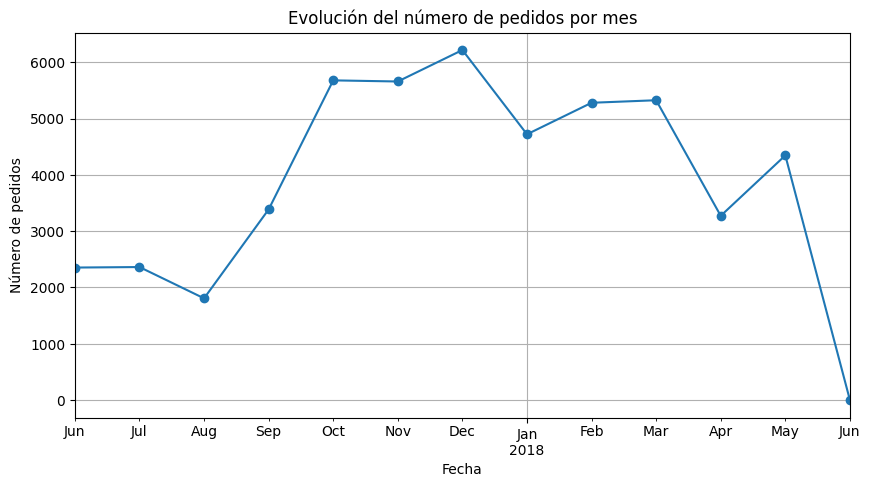

In [7]:
# Visualización 1: Evolución del número de pedidos por mes
plt.figure(figsize=(10, 5))
orders_per_month.plot(marker='o', linestyle='-')
plt.title("Evolución del número de pedidos por mes")
plt.xlabel("Fecha")
plt.ylabel("Número de pedidos")
plt.grid(True)
plt.show()


El gráfico muestra la variación en la cantidad de pedidos realizados mensualmente en la plataforma. Se observa un aumento significativo desde septiembre hasta diciembre, seguido de fluctuaciones en los primeros meses de 2018. Hay una caída notable en abril y junio, lo que sugiere posibles efectos estacionales o cambios en la estrategia de marketing.


## Gasto en marketing por fuente de adquisición

### Objetivo
Este gráfico muestra cuánto se ha gastado en cada fuente de adquisición. Permite identificar cuáles han recibido mayor inversión y analizar si este gasto está relacionado con la conversión de clientes.

### Lo que se busca analizar
- Comparar la inversión en diferentes fuentes de adquisición.
- Identificar si el gasto está distribuido equitativamente o si algunas fuentes reciben mayor atención.
- Relacionar la inversión con el rendimiento de cada canal en términos de clientes adquiridos y retorno sobre inversión.


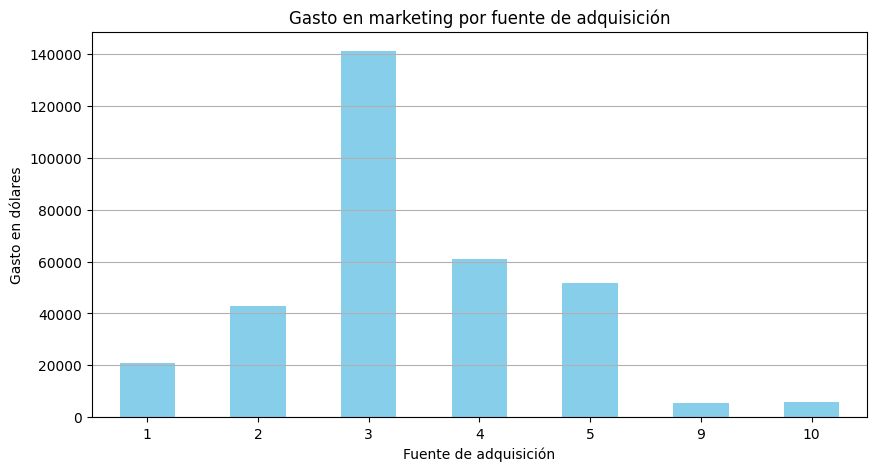

In [8]:
# Visualización 2: Gasto en marketing por fuente de adquisición
plt.figure(figsize=(10, 5))
spend_by_source.plot(kind="bar", color="skyblue")
plt.title("Gasto en marketing por fuente de adquisición")
plt.xlabel("Fuente de adquisición")
plt.ylabel("Gasto en dólares")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

El gráfico muestra la distribución del gasto publicitario entre diferentes fuentes de adquisición. Se observa que la fuente 3 ha recibido la mayor inversión, superando los 140,000 dólares, mientras que otras fuentes como 9 y 10 han recibido montos significativamente menores. Este análisis ayuda a evaluar si la distribución del gasto está alineada con la rentabilidad y conversión de clientes.


## Comparación del Costo de Adquisición de Clientes (CAC) y el Valor de por Vida del Cliente (LTV)

### Objetivo
Este gráfico compara el costo promedio de adquirir un cliente con el valor total que este genera en la plataforma. Permite visualizar si la inversión en adquisición de clientes es rentable o si se están gastando más recursos de los que los clientes generan en ingresos.

### Lo que se busca analizar
- Evaluar si el CAC es menor que el LTV, lo que indicaría una estrategia de adquisición sostenible.
- Determinar si el costo de adquisición supera el valor de vida del cliente, lo que implicaría pérdidas en la rentabilidad.
- Identificar la necesidad de reducir costos de adquisición o aumentar la retención de clientes para mejorar la rentabilidad.


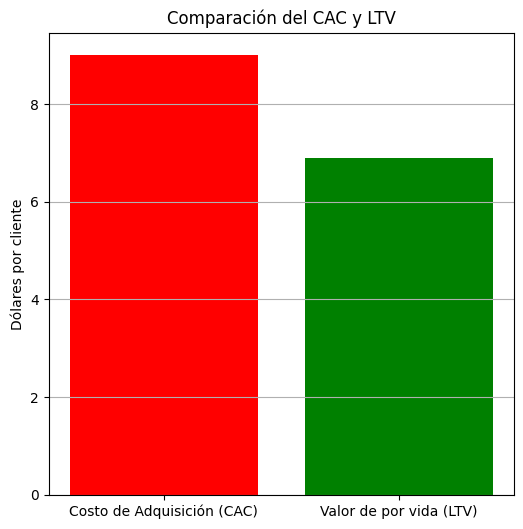

In [9]:

# Visualización 3: Comparación del Costo de Adquisición de Clientes (CAC) y el Valor de por Vida del Cliente (LTV)
plt.figure(figsize=(6, 6))
plt.bar(["Costo de Adquisición (CAC)", "Valor de por vida (LTV)"], [cac, average_ltv], color=["red", "green"])
plt.title("Comparación del CAC y LTV")
plt.ylabel("Dólares por cliente")
plt.grid(axis="y")
plt.show()

El gráfico muestra que el costo de adquisición de clientes (CAC) es mayor que el valor de por vida del cliente (LTV). Esto indica que la empresa está gastando más en adquirir cada cliente de lo que este genera en ingresos, lo que puede afectar la rentabilidad del negocio. Para mejorar la sostenibilidad, se recomienda reducir el CAC o aumentar el LTV mediante estrategias de retención y recompra.


## Distribución del tiempo de conversión de usuarios

### Objetivo
Este gráfico muestra cuántos días tardan los usuarios en realizar su primera compra después de su primera visita. Permite analizar el comportamiento de conversión y determinar si la mayoría de los clientes compran rápidamente o si requieren más tiempo para decidirse.

### Lo que se busca analizar
- Identificar cuántos usuarios convierten el mismo día de su primera visita.
- Evaluar cuántos usuarios tardan varios días en realizar su primera compra.
- Detectar posibles oportunidades para mejorar la conversión a través de estrategias de remarketing o incentivos tempranos.


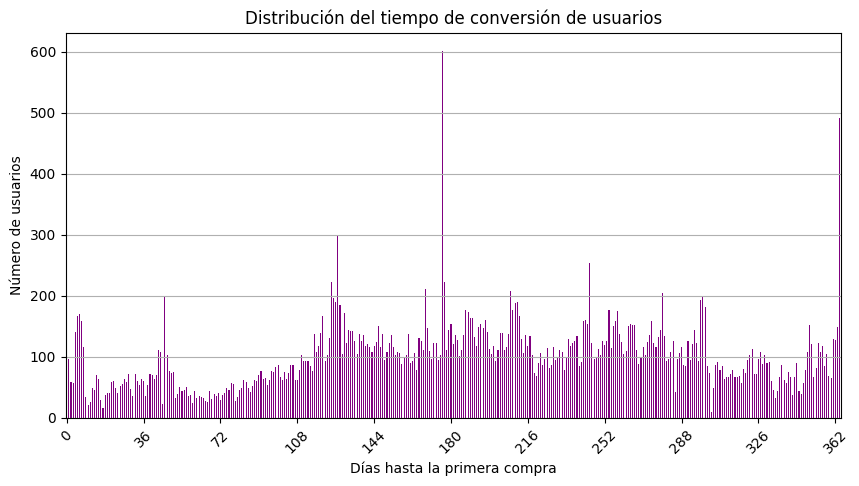

In [10]:
# Reducir la cantidad de etiquetas en el eje X para mejorar la legibilidad
plt.figure(figsize=(10, 5))
ax = conversion_distribution.plot(kind="bar", color="purple")

# Modificar las etiquetas del eje X para que solo aparezcan cada ciertos valores
xticks = range(0, len(conversion_distribution), len(conversion_distribution) // 10)
ax.set_xticks(xticks)
ax.set_xticklabels([conversion_distribution.index[i] for i in xticks], rotation=45)

plt.title("Distribución del tiempo de conversión de usuarios")
plt.xlabel("Días hasta la primera compra")
plt.ylabel("Número de usuarios")
plt.grid(axis="y")
plt.show()

El gráfico muestra la cantidad de días que tardan los usuarios en realizar su primera compra después de visitar la plataforma. Se ha optimizado el eje X para mejorar la legibilidad, destacando los intervalos clave. Se observa que hay conversiones constantes a lo largo del tiempo, con picos en ciertos momentos, particularmente alrededor de los 180 días. Esto puede indicar que algunos usuarios requieren un largo período antes de decidirse a comprar, lo que sugiere la necesidad de estrategias de remarketing y recordatorios para acelerar la conversión.


## Evolución del gasto en marketing a lo largo del tiempo

### Objetivo
Este gráfico muestra cómo ha variado la inversión en marketing mes a mes. Permite evaluar si los cambios en la inversión han tenido un impacto en la adquisición de clientes y en los ingresos generados.

### Lo que se busca analizar
- Identificar tendencias en el gasto publicitario a lo largo del tiempo.
- Evaluar si hay aumentos o reducciones significativas en la inversión.
- Relacionar la inversión en marketing con el desempeño en ventas y la conversión de usuarios.


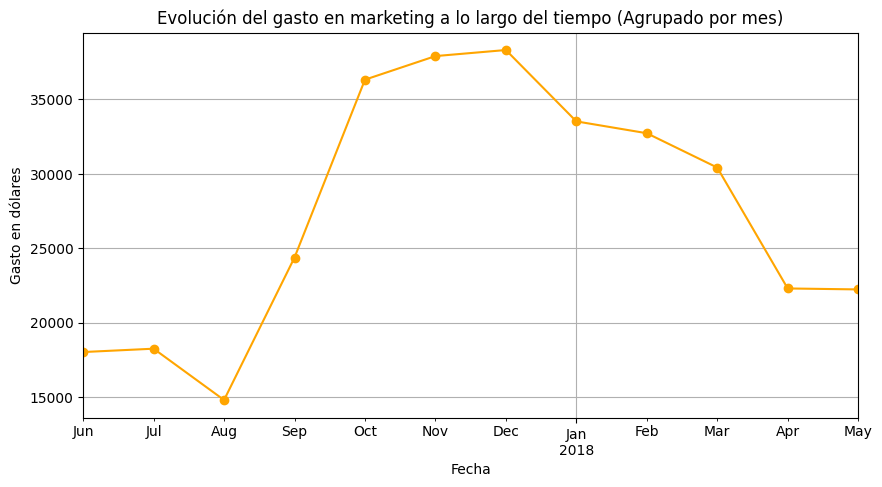

In [11]:
# Agrupar los datos por mes en lugar de días para mejorar la legibilidad
costs_monthly = costs_data.resample("M", on="dt")["costs"].sum()

plt.figure(figsize=(10, 5))
costs_monthly.plot(marker="o", linestyle="-", color="orange")
plt.title("Evolución del gasto en marketing a lo largo del tiempo (Agrupado por mes)")
plt.xlabel("Fecha")
plt.ylabel("Gasto en dólares")
plt.grid(True)
plt.show()


El gráfico muestra la evolución del gasto en marketing mes a mes, lo que permite identificar tendencias de inversión a lo largo del tiempo. Se observa un fuerte incremento entre agosto y diciembre, alcanzando su punto más alto en ese período. Posteriormente, hay una reducción progresiva en la inversión durante los primeros meses de 2018. Esto podría indicar una estrategia de mayor inversión a finales del año para captar clientes en temporadas clave, seguida de un ajuste en el presupuesto.

La agrupación mensual ha permitido visualizar mejor la tendencia general, evitando la volatilidad diaria y facilitando la interpretación de los datos.


## Conclusiones y Recomendaciones Estratégicas

### Resumen del análisis
Se ha realizado un análisis detallado del comportamiento de los usuarios en la plataforma Showz, evaluando las visitas, la conversión de clientes, las ventas y la rentabilidad del marketing. Los resultados han permitido identificar patrones clave y oportunidades de mejora.

### Principales hallazgos

#### Comportamiento de los usuarios
- El número de usuarios únicos muestra una tendencia creciente, aunque la mayoría no regresa después de la primera visita.
- La duración promedio de una sesión es de aproximadamente 10 minutos, lo que sugiere que los usuarios exploran la plataforma por un tiempo moderado antes de salir.
- La conversión de usuarios ocurre mayormente en los primeros días, aunque hay un número significativo que tarda semanas o meses en realizar su primera compra.

#### Ventas y conversión de clientes
- El volumen de pedidos ha mostrado un crecimiento sostenido, con picos en ciertos meses.
- El tamaño promedio de compra es bajo, alrededor de 5 dólares, lo que indica que los usuarios prefieren transacciones pequeñas y recurrentes.
- El valor de por vida del cliente (LTV) es de 6.90 dólares, lo que sugiere que la mayoría de los clientes realizan solo una o dos compras antes de abandonar la plataforma.

#### Rentabilidad del marketing
- El gasto total en marketing fue de 329,131.62 dólares, con una fuerte concentración en la fuente 3.
- El costo de adquisición de clientes (CAC) es de 9.01 dólares, lo que significa que cada nuevo cliente cuesta más de lo que genera en ingresos.
- El retorno sobre la inversión en marketing (ROMI) es negativo (-23.4%), lo que indica que la estrategia actual no es sostenible financieramente.

### Recomendaciones estratégicas

#### Optimización del marketing
1. **Reducir el costo de adquisición de clientes (CAC)**  
   - Evaluar qué fuentes de adquisición generan clientes con mayor LTV y ajustar la inversión en función de su rentabilidad.
   - Implementar estrategias de marketing orgánico y referidos para disminuir la dependencia de la publicidad paga.

2. **Mejorar la retención de clientes y aumentar el LTV**  
   - Implementar estrategias de fidelización como descuentos para compras recurrentes o membresías con beneficios exclusivos.
   - Optimizar la experiencia del usuario en la plataforma para incentivar compras adicionales y reducir la tasa de abandono.

3. **Ajustar la inversión publicitaria para mejorar el ROMI**  
   - Redistribuir el presupuesto de marketing enfocándose en las fuentes de adquisición más rentables.
   - Evaluar si las campañas de mayor inversión han generado un impacto positivo en la conversión.

4. **Reducir el tiempo de conversión**  
   - Implementar estrategias de remarketing para atraer a los usuarios que no convierten en su primera visita.
   - Ofrecer incentivos como descuentos o promociones temporales para acelerar la conversión.

### Conclusión
El análisis sugiere que Showz debe reestructurar su estrategia de marketing y retención de clientes para mejorar la rentabilidad. Se recomienda optimizar el presupuesto de adquisición, mejorar la fidelización y reducir el tiempo de conversión con tácticas más efectivas.

Estos cambios permitirán mejorar el retorno sobre la inversión y generar una base de clientes más sólida y rentable a largo plazo.
